1. 12_Data.csv 파일을 불러와 df1으로 선언 한 뒤, 아래의 미션을 수행
(해당 데이터는 체강 세포 이미지 데이터로, 구강 내 암세포(M)와 정상세포(B)의 기하적 특성을 수치화 한 자료)

In [2]:
import pandas as pd

df1 = pd.read_csv("12_Data.csv")
df1.head()

,Image ID,Diagnosis,Mean Radius,Mean Perimeter,Mean Area,Mean Texture,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,SE Radius,SE Perimeter,SE Area,SE Texture,SE Smoothness,SE Compactness,SE Concavity,SE Concave Points,SE Symmetry,SE Fractal Dim
0,842302,M,17.99,122.80,1001.0,10.38,0.12,0.27760,0.3001,0.1471,...,1.0950,8.589,153.40,0.9053,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062
1,842517,M,20.57,132.90,1326.0,17.77,0.08,0.07864,0.0869,0.0702,...,0.5435,3.398,74.08,0.7339,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035
2,84300903,M,19.69,130.00,1203.0,21.25,0.11,0.15990,0.1974,0.1279,...,0.7456,4.585,94.03,0.7869,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046
3,84348301,M,11.42,77.58,386.1,20.38,0.14,0.28390,0.2414,0.1052,...,0.4956,3.445,27.23,1.1560,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092
4,84358402,M,20.29,135.10,1297.0,14.34,0.10,0.13280,0.1980,0.1043,...,0.7572,5.438,94.44,0.7813,0.0115,0.0246,0.0569,0.0189,0.0176,0.0051


1. "Max" 이름이 붙은 Column의 기술통계량을 확인하시오.

In [7]:
cols = [i for i in df1.columns if "Max" in i]
df1[cols].describe()

,Max Radius,Max Perimeter,Max Area,Max Texture,Max Smoothness,Max Compactness,Max Concavity,Max Concave Points,Max Symmetry,Max Fractal Dim
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,16.269209,107.261213,880.583128,25.677223,0.132197,0.254253,0.272250,0.114745,0.290316,0.083989
std,4.833217,33.602542,569.356993,6.146258,0.023292,0.157357,0.208666,0.065767,0.062011,0.018185
min,7.930000,50.410000,185.200000,12.020000,0.070000,0.030000,0.000000,0.000000,0.160000,0.060000
25%,13.010000,84.110000,515.300000,21.080000,0.120000,0.150000,0.110000,0.060000,0.250000,0.070000
50%,14.970000,97.660000,686.500000,25.410000,0.130000,0.210000,0.230000,0.100000,0.280000,0.080000
75%,18.790000,125.400000,1084.000000,29.720000,0.150000,0.340000,0.380000,0.160000,0.320000,0.090000
max,36.040000,251.200000,4254.000000,49.540000,0.220000,1.060000,1.250000,0.290000,0.660000,0.210000


2. Mean Radius(세포 평균 반지름)값에서 평균으로부터 표준편차 3배 이상 떨어진 데이터의 개수를 확인하시오.

In [15]:
A = df1['Mean Radius'] >= df1['Mean Radius'].mean() + df1['Mean Radius'].std() * 3
B = df1['Mean Radius'] <= df1['Mean Radius'].mean() - df1['Mean Radius'].std() * 3

len(df1[A | B])

5

3. Diagnosis(진단 - 암/정상세포 여부)에 따라 Mean Radius(세포 평균 반지름)의 대표값의 차이가 있는지 가설검정을 수행하시오.

In [17]:
df1['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [23]:
import scipy.stats as stats

A = df1["Diagnosis"] == 'M'

sample1 = df1.loc[A]
sample2 = df1.loc[~A]

print(stats.normaltest(sample1['Mean Radius']))
print(stats.normaltest(sample2['Mean Radius']))

NormaltestResult(statistic=9.774681423412504, pvalue=0.0075414507243749054)
NormaltestResult(statistic=0.431413656391856, pvalue=0.805971555375275)


In [24]:
stats.ranksums(sample1['Mean Radius'], sample2['Mean Radius'])

RanksumsResult(statistic=17.46423979127818, pvalue=2.682506544617575e-68)

4. Mean Radius(세포 평균 반지름)과 Mean Smoothness(세포 평균 곡률/매끄러움 정도)의 상관성이 있는지 가설검정을 수행하고, 상관 계수를 확인하시오. Correlation Coefficent

In [27]:
A = df1['Mean Radius']
B = df1['Mean Smoothness']

print(stats.normaltest(A))
print(stats.normaltest(B))

NormaltestResult(statistic=73.19882231579592, pvalue=1.2737309250385324e-16)
NormaltestResult(statistic=16.224407582610276, pvalue=0.00029985732154021345)


In [28]:
stats.spearmanr(A, B)

SignificanceResult(statistic=0.125935259003714, pvalue=0.002617573533346598)

In [32]:
df1[['Mean Radius', 'Mean Smoothness']].corr(method = "spearman")

,Mean Radius,Mean Smoothness
Mean Radius,1.000000,0.125935
Mean Smoothness,0.125935,1.000000


5. 'Mean'이름이 포함된 모든 Column에 대해 정규성 검정을 실시하고, 정규분포를 따르지 않는 Column들을 모두 Histogram으로 시각화 하는 함수를 구성하시오.

In [40]:
import matplotlib.pyplot as plt

def func():
    cols = [i for i in df1.columns if "Mean" in i]

    fig = plt.figure(figsize = (20, 10))

    for i in cols:
        a = df1[i]
        value, p = stats.normaltest(a)
        if p < 0.05:
            plt.hist(df1[i], bins = 20, alpha = 0.5)

    plt.grid()
    plt.legend(cols)
    plt.show()

6. 세포의 기하구조를 입력했을 때, 암/정상 세포를 판단하는 분류모델을 만들고자 한다. 'Mean'이름이 포함된 모든 Column을 X로, Diagnosis를 Y로 선언하여, X를 입력했을 때, Y를 분류하는 분류모델을 생성하시오.
* 알고리즘은 Decision Tree를 이용
* 학습 / 검증 데이터 비율은 75% : 25% (Random State - 1234)
* 생성된 모델을 model_cell.sav로 저장

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle

In [57]:
cols = [i for i in df1.columns if "Mean" in i]

X = df1[cols].to_numpy()
Y = df1['Diagnosis'].replace({"M" : 1, "B" : 0}).to_numpy()

train_x, test_x, train_y, test_y = train_test_split(X, Y)

model = LogisticRegression(max_iter=1000) # 과대적합
model.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

In [50]:
f = open("model_cell.sav", 'wb')
pickle.dump(model, f)
f.close()

In [58]:
pred = model.predict(test_x)
pred

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [59]:
from sklearn.metrics import classification_report

report = classification_report(pred, test_y)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        94
           1       0.87      0.94      0.90        49

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.92       143
weighted avg       0.93      0.93      0.93       143



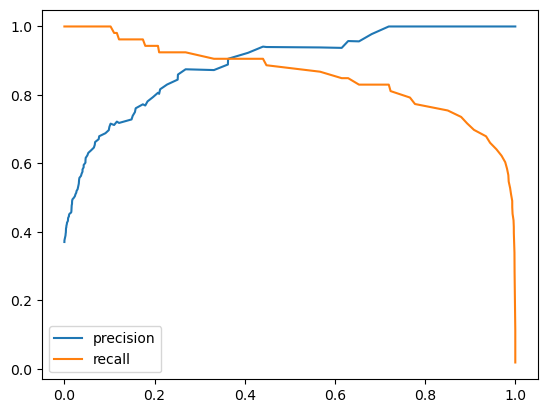

In [63]:
from sklearn.metrics import precision_recall_curve

proba = model.predict_proba(test_x)[:, 1]

# 가장 높은 임계값
precision, recall, thresholds = precision_recall_curve(test_y, proba)

plt.plot(thresholds, precision[:-1], label = "precision")
plt.plot(thresholds, recall[:-1], label = "recall")
plt.legend()
plt.show()

In [65]:
from sklearn.metrics import roc_auc_score, roc_curve

roc_auc_score(test_y, proba)

0.9819706498951781

In [66]:
fpr, tpr, th = roc_curve(test_y, proba)

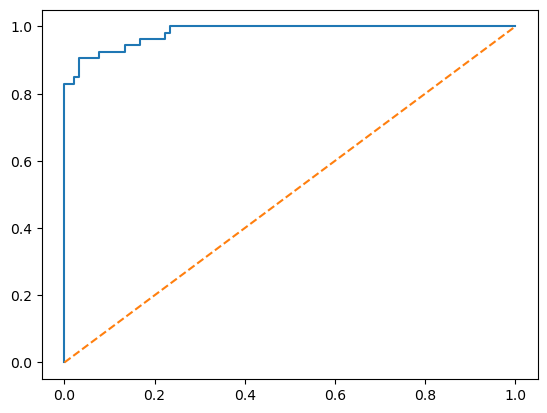

In [68]:
sample = pd.DataFrame()
sample['FPR'] = fpr
sample['TPR'] = tpr
sample['Thresholds'] = th

plt.plot(sample['FPR'], sample['TPR'])
plt.plot([0,1], [0,1], linestyle = "--")
plt.show()